In [175]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [176]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [177]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [178]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [179]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [180]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [181]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b54569de454855c9a87d6b5048ebff


In [182]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [183]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | gravelbourg
Processing Record 2 of Set 13 | port macquarie
Processing Record 3 of Set 13 | tabou
Processing Record 4 of Set 13 | ostrovnoy
Processing Record 5 of Set 13 | barrow
Processing Record 6 of Set 13 | evensk
Processing Record 7 of Set 13 | touros
Processing Record 8 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 13 | rikitea
Processing Record 10 of Set 13 | vaini
Processing Record 11 of Set 13 | tasiilaq
Processing Record 12 of Set 13 | pisco
Processing Record 13 of Set 13 | novyy urengoy
Processing Record 14 of Set 13 | nantucket
Processing Record 15 of Set 13 | altamirano
Processing Record 16 of Set 13 | hermanus
Processing Record 17 of Set 13 | yellowknife
Processing Record 18 of Set 13 | panikian
Processing Record 19 of Set 13 | bluff
Processing Record 20 of Set 13 | deputatskiy
Processing Record 21 of Set 13 | mananara
Processing Record 22 of Set 1

Processing Record 35 of Set 16 | pousat
City not found. Skipping...
Processing Record 36 of Set 16 | katherine
Processing Record 37 of Set 16 | praia
Processing Record 38 of Set 16 | nanortalik
Processing Record 39 of Set 16 | valparaiso
Processing Record 40 of Set 16 | chokurdakh
Processing Record 41 of Set 16 | krasnyy chikoy
Processing Record 42 of Set 16 | codrington
Processing Record 43 of Set 16 | lavrentiya
Processing Record 44 of Set 16 | saleaula
City not found. Skipping...
Processing Record 45 of Set 16 | haines junction
Processing Record 46 of Set 16 | port moresby
Processing Record 47 of Set 16 | russkiy aktash
Processing Record 48 of Set 16 | shaunavon
Processing Record 49 of Set 16 | aleppo
Processing Record 50 of Set 16 | qui nhon
Processing Record 1 of Set 17 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 17 | katiola
Processing Record 3 of Set 17 | saint-joseph
Processing Record 4 of Set 17 | rosarito
Processing Record 5 of Set 17 | severo-kurils

Processing Record 16 of Set 20 | ancud
Processing Record 17 of Set 20 | roebourne
Processing Record 18 of Set 20 | taksimo
Processing Record 19 of Set 20 | margate
Processing Record 20 of Set 20 | ust-barguzin
Processing Record 21 of Set 20 | bangassou
Processing Record 22 of Set 20 | carlsbad
Processing Record 23 of Set 20 | clyde river
Processing Record 24 of Set 20 | oranjestad
Processing Record 25 of Set 20 | saint-augustin
Processing Record 26 of Set 20 | abu kamal
Processing Record 27 of Set 20 | lundazi
Processing Record 28 of Set 20 | waterloo
Processing Record 29 of Set 20 | bonavista
Processing Record 30 of Set 20 | zonguldak
Processing Record 31 of Set 20 | halmstad
Processing Record 32 of Set 20 | myaundzha
Processing Record 33 of Set 20 | emba
Processing Record 34 of Set 20 | semporna
Processing Record 35 of Set 20 | jutai
Processing Record 36 of Set 20 | necochea
Processing Record 37 of Set 20 | farmington
Processing Record 38 of Set 20 | kargil
Processing Record 39 of Se

Processing Record 50 of Set 23 | san ramon de la nueva oran
Processing Record 1 of Set 24 | kawalu
Processing Record 2 of Set 24 | faya
Processing Record 3 of Set 24 | kailua
Processing Record 4 of Set 24 | alta floresta
Processing Record 5 of Set 24 | changli
Processing Record 6 of Set 24 | peniche
Processing Record 7 of Set 24 | kjollefjord
Processing Record 8 of Set 24 | tunduru
City not found. Skipping...
Processing Record 9 of Set 24 | bardiyah
Processing Record 10 of Set 24 | piacabucu
Processing Record 11 of Set 24 | wad madani
Processing Record 12 of Set 24 | fremont
Processing Record 13 of Set 24 | port blair
Processing Record 14 of Set 24 | menongue
Processing Record 15 of Set 24 | longlac
City not found. Skipping...
Processing Record 16 of Set 24 | great yarmouth
Processing Record 17 of Set 24 | kletskaya
Processing Record 18 of Set 24 | sinnamary
Processing Record 19 of Set 24 | madimba
Processing Record 20 of Set 24 | corsicana
Processing Record 21 of Set 24 | vostok
Proce

In [184]:
len(city_data)

570

In [185]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gravelbourg,49.88,-106.55,74.34,49,100,2.42,CA,2020-08-21 02:36:41
1,Port Macquarie,-31.43,152.92,66.00,33,63,1.99,AU,2020-08-21 02:30:35
2,Tabou,4.42,-7.35,74.97,84,70,10.29,CI,2020-08-21 02:35:59
3,Ostrovnoy,68.05,39.51,55.51,80,100,14.70,RU,2020-08-21 02:35:04
4,Barrow,71.29,-156.79,46.40,87,90,9.17,US,2020-08-21 02:34:09
5,Evensk,61.95,159.23,49.19,87,100,27.16,RU,2020-08-21 02:36:42
6,Touros,-5.20,-35.46,75.20,94,40,6.93,BR,2020-08-21 02:35:26
7,Rikitea,-23.12,-134.97,66.18,78,100,25.34,PF,2020-08-21 02:33:34
8,Vaini,-21.20,-175.20,80.60,83,75,4.70,TO,2020-08-21 02:34:29
9,Tasiilaq,65.61,-37.64,39.20,86,0,1.12,GL,2020-08-21 02:34:33


In [186]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [187]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gravelbourg,CA,2020-08-21 02:36:41,49.88,-106.55,74.34,49,100,2.42
1,Port Macquarie,AU,2020-08-21 02:30:35,-31.43,152.92,66.00,33,63,1.99
2,Tabou,CI,2020-08-21 02:35:59,4.42,-7.35,74.97,84,70,10.29
3,Ostrovnoy,RU,2020-08-21 02:35:04,68.05,39.51,55.51,80,100,14.70
4,Barrow,US,2020-08-21 02:34:09,71.29,-156.79,46.40,87,90,9.17
5,Evensk,RU,2020-08-21 02:36:42,61.95,159.23,49.19,87,100,27.16
6,Touros,BR,2020-08-21 02:35:26,-5.20,-35.46,75.20,94,40,6.93
7,Rikitea,PF,2020-08-21 02:33:34,-23.12,-134.97,66.18,78,100,25.34
8,Vaini,TO,2020-08-21 02:34:29,-21.20,-175.20,80.60,83,75,4.70
9,Tasiilaq,GL,2020-08-21 02:34:33,65.61,-37.64,39.20,86,0,1.12


In [188]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [189]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

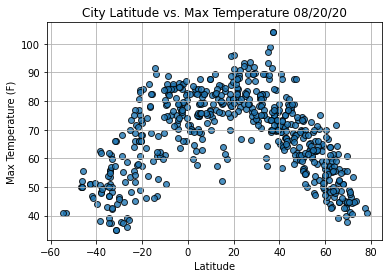

In [190]:
# Import the time module.
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

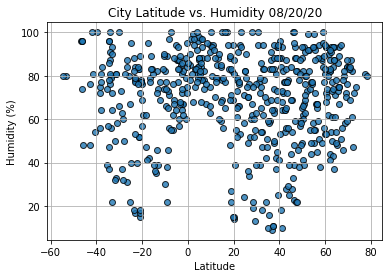

In [191]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

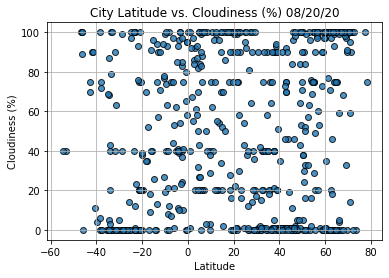

In [192]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

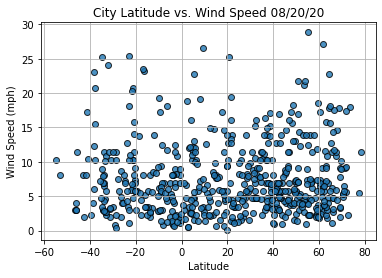

In [193]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [194]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [206]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values,)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.tight_layout()
    plt.title(title)
    plt.show()

In [207]:
index13 = city_data_df.loc[13]
index13

City                   Altamirano
Country                        MX
Date          2020-08-21 02:36:44
Lat                         16.88
Lng                        -92.15
Max Temp                    59.63
Humidity                      100
Cloudiness                    100
Wind Speed                    1.5
Name: 13, dtype: object

In [208]:
# only get T/F
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
565    False
566    False
567    False
568     True
569     True
Name: Lat, Length: 570, dtype: bool

In [209]:
# loc methon with conditional
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gravelbourg,CA,2020-08-21 02:36:41,49.88,-106.55,74.34,49,100,2.42
2,Tabou,CI,2020-08-21 02:35:59,4.42,-7.35,74.97,84,70,10.29
3,Ostrovnoy,RU,2020-08-21 02:35:04,68.05,39.51,55.51,80,100,14.70
4,Barrow,US,2020-08-21 02:34:09,71.29,-156.79,46.40,87,90,9.17
5,Evensk,RU,2020-08-21 02:36:42,61.95,159.23,49.19,87,100,27.16


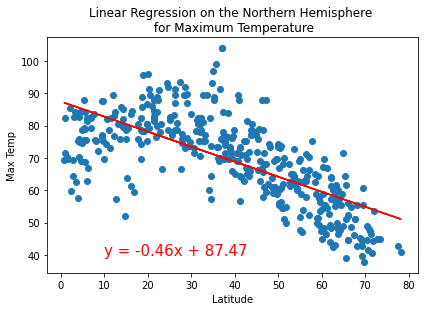

In [210]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))


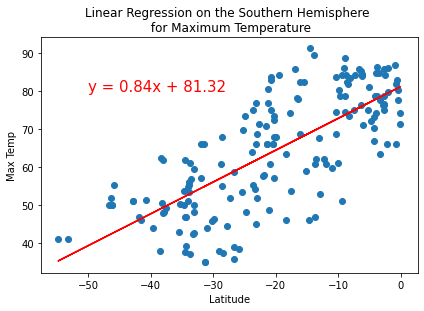

In [211]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))


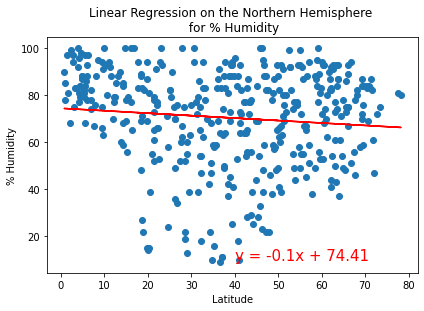

In [213]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

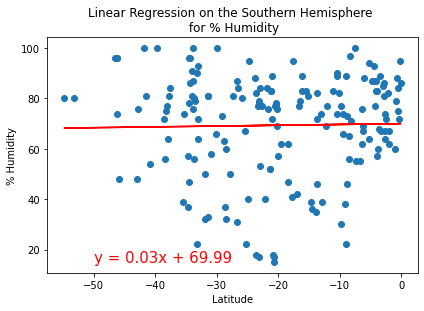

In [214]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

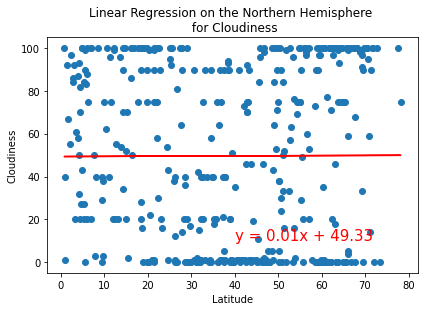

In [215]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Cloudiness', 'Cloudiness',(40,10))

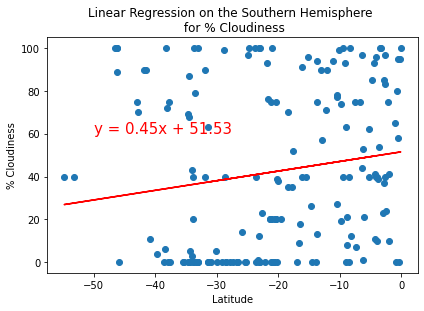

In [217]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

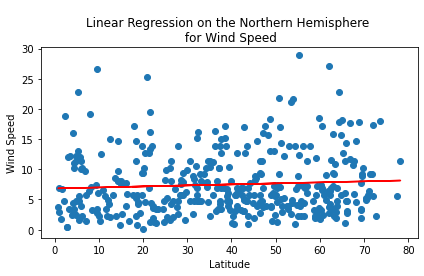

In [218]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

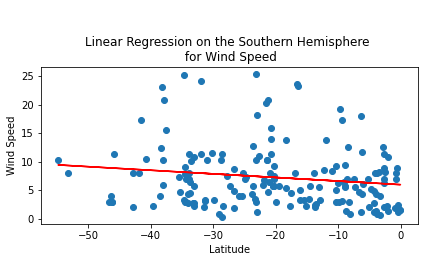

In [219]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))